<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/ghz_state.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generate a GHZ state on 28 qubits**

The built-in cuQuantum state vector backend is selected by default if a local GPU is present. Alternatively, the target may be manually set through the cudaq.set_target("nvidia") command.


[Greenberger–Horne–Zeilinger (GHZ) state](https://en.m.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state) is an entangled quantum state that involves at least three subsystems (particle states, qubits, or qudits)

https://nvidia.github.io/cuda-quantum/0.7.1/using/examples/cuquantum.html

In [1]:
# This example is meant to demonstrate the cuQuantum
# GPU-accelerated backends and their ability to easily handle
# a larger number of qubits compared the CPU-only backend.
#
# This will take a noticeably longer time to execute on
# CPU-only backends.

!pip install cudaq -q
import cudaq

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.8/122.8 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.3/202.3 MB 3.8 MB/s eta 0:00:00


In [3]:
cudaq.set_target("nvidia")

qubit_count = 10
# We can set a larger `qubit_count` if running on a GPU backend.
# qubit_count = 28


@cudaq.kernel
def kernel(qubit_count: int):
    qvector = cudaq.qvector(qubit_count)
    h(qvector)
    for qubit in range(qubit_count - 1):
        x.ctrl(qvector[qubit], qvector[qubit + 1])
    mz(qvector)


result = cudaq.sample(kernel, qubit_count, shots_count=100)

if (not cudaq.mpi.is_initialized()) or (cudaq.mpi.rank() == 0):
    print(result)

{ 0000000001:1 0000010010:1 0000010111:1 0000011000:1 0000011101:1 0000101111:1 0000110001:1 0000110100:1 0000111101:1 0000111111:1 0001000111:1 0001001100:1 0001010000:1 0001010101:1 0001011001:1 0001101100:1 0001101111:1 0001110110:1 0010000100:1 0010010111:1 0010011011:1 0010100100:1 0010100111:1 0011001101:1 0011001111:1 0011011101:1 0011110110:1 0011111001:1 0011111111:1 0100000101:2 0100000110:1 0100001000:1 0100010111:1 0100011011:1 0100100111:1 0100101101:1 0100110011:1 0100111010:1 0101001100:2 0101011100:1 0101101010:1 0101101100:1 0101110011:1 0101110110:1 0101111000:1 0110000001:1 0110000011:1 0110001001:1 0110001110:1 0110100100:1 0110101010:1 0110101101:1 0110101111:1 0110110011:1 0110111100:1 0110111101:1 0110111110:1 0110111111:1 0111101011:1 0111110010:1 0111110011:1 0111110100:1 1000000111:1 1000001000:1 1000010011:1 1000011001:1 1001000011:1 1001100100:1 1001110101:1 1001110110:1 1010001101:1 1010111001:1 1010111011:1 1011011010:1 1011100101:1 1011101010:1 1011110111

Available CUDA-Q targets:
[<cudaq.mlir._mlir_libs._quakeDialects.cudaq_runtime.Target object at 0x7e4d4f570170>, <cudaq.mlir._mlir_libs._quakeDialects.cudaq_runtime.Target object at 0x7e4d4ee31ff0>, <cudaq.mlir._mlir_libs._quakeDialects.cudaq_runtime.Target object at 0x7e4d4ee32130>, <cudaq.mlir._mlir_libs._quakeDialects.cudaq_runtime.Target object at 0x7e4d4ee31f30>, <cudaq.mlir._mlir_libs._quakeDialects.cudaq_runtime.Target object at 0x7e4d4ee320b0>, <cudaq.mlir._mlir_libs._quakeDialects.cudaq_runtime.Target object at 0x7e4d4ee321f0>, <cudaq.mlir._mlir_libs._quakeDialects.cudaq_runtime.Target object at 0x7e4d4ee32230>, <cudaq.mlir._mlir_libs._quakeDialects.cudaq_runtime.Target object at 0x7e4d4ee32270>, <cudaq.mlir._mlir_libs._quakeDialects.cudaq_runtime.Target object at 0x7e4d4ee322f0>, <cudaq.mlir._mlir_libs._quakeDialects.cudaq_runtime.Target object at 0x7e4d4ee32330>, <cudaq.mlir._mlir_libs._quakeDialects.cudaq_runtime.Target object at 0x7e4d4ee32370>, <cudaq.mlir._mlir_libs._qua

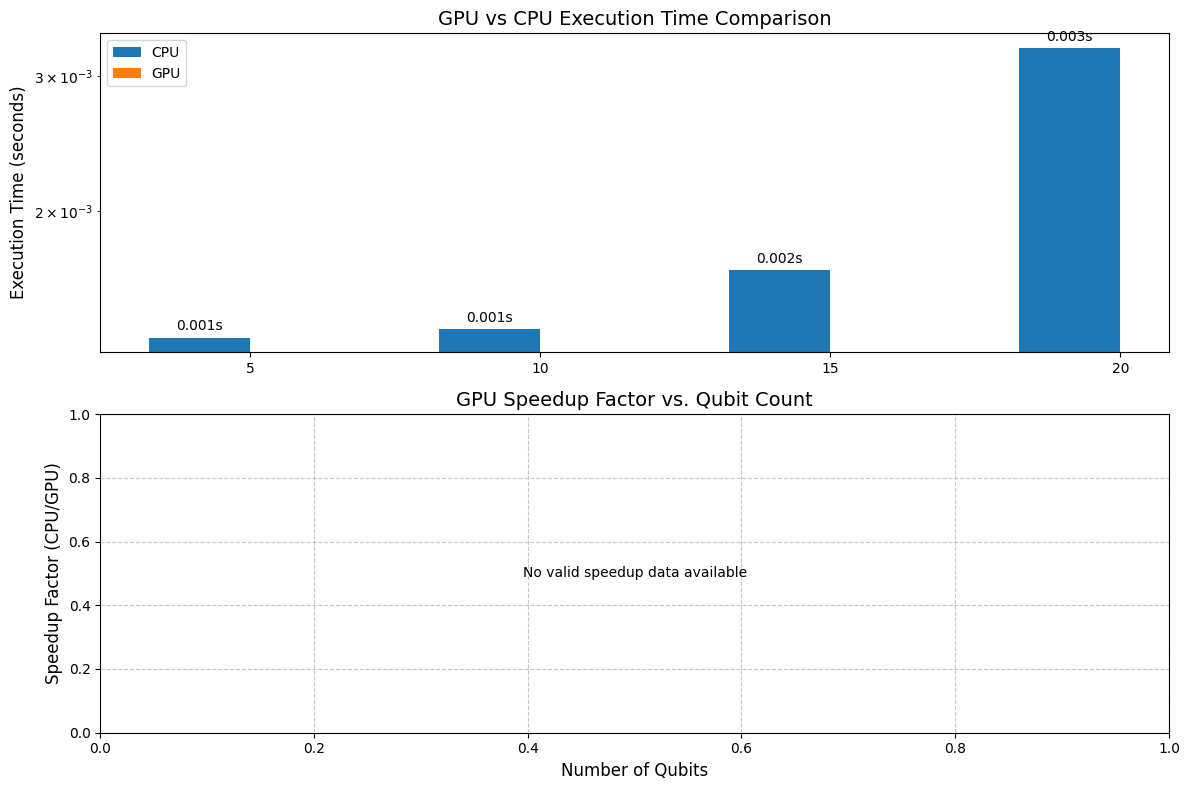


Analysis completed and visualization created!


In [4]:
import cudaq
import time
import matplotlib.pyplot as plt
import numpy as np

# List of qubit counts to test
qubit_counts = [5, 10, 15, 20]

# Dictionary to store execution times
execution_times = {
    'cpu': [],
    'gpu': []
}

# First, let's check available targets
print("Available CUDA-Q targets:")
available_targets = []
try:
    available_targets = cudaq.get_targets()
    print(available_targets)
except Exception as e:
    print(f"Couldn't get targets list: {e}")
    print("Will use default target for CPU and 'nvidia' for GPU.")

# Determine CPU and GPU target names
cpu_target = None
gpu_target = None

# Try to identify CPU and GPU targets
if available_targets:
    for target in available_targets:
        target_info = str(target).lower()
        if 'cpu' in target_info or 'qpp' in target_info:
            cpu_target = str(target)
        if 'gpu' in target_info or 'nvidia' in target_info or 'cuda' in target_info:
            gpu_target = str(target)

# If targets weren't found, use defaults
if not cpu_target:
    # Use the default target for CPU (no set_target call)
    cpu_target = "default"
if not gpu_target:
    gpu_target = "nvidia"

# Define the quantum kernel
@cudaq.kernel
def quantum_circuit(qubit_count: int):
    qvector = cudaq.qvector(qubit_count)
    h(qvector)
    for qubit in range(qubit_count - 1):
        x.ctrl(qvector[qubit], qvector[qubit + 1])
    mz(qvector)

# Run on CPU backend
print(f"Running benchmarks on CPU backend (target: {cpu_target})...")

for count in qubit_counts:
    print(f"Testing with {count} qubits on CPU...")

    # Only set target if not using default
    if cpu_target != "default":
        try:
            cudaq.set_target(cpu_target)
        except Exception as e:
            print(f"Error setting CPU target: {e}")
            print("Continuing with default target")

    try:
        # Warm-up run
        _ = cudaq.sample(quantum_circuit, count, shots_count=100)

        # Timed run
        start_time = time.time()
        result_cpu = cudaq.sample(quantum_circuit, count, shots_count=100)
        end_time = time.time()

        cpu_time = end_time - start_time
        execution_times['cpu'].append(cpu_time)
        print(f"CPU time for {count} qubits: {cpu_time:.4f} seconds")
    except Exception as e:
        print(f"Error running CPU benchmark with {count} qubits: {e}")
        execution_times['cpu'].append(float('nan'))

# Run on GPU backend
print(f"\nRunning benchmarks on GPU backend (target: {gpu_target})...")

gpu_target_set = False
try:
    cudaq.set_target(gpu_target)
    gpu_target_set = True
    print(f"Successfully set GPU target to {gpu_target}")
except Exception as e:
    print(f"Could not set GPU target: {e}")
    print("Skipping GPU benchmarks")
    execution_times['gpu'] = [float('nan')] * len(qubit_counts)

if gpu_target_set:
    for count in qubit_counts:
        print(f"Testing with {count} qubits on GPU...")

        try:
            # Warm-up run
            _ = cudaq.sample(quantum_circuit, count, shots_count=100)

            # Timed run
            start_time = time.time()
            result_gpu = cudaq.sample(quantum_circuit, count, shots_count=100)
            end_time = time.time()

            gpu_time = end_time - start_time
            execution_times['gpu'].append(gpu_time)
            print(f"GPU time for {count} qubits: {gpu_time:.4f} seconds")
        except Exception as e:
            print(f"Error running GPU benchmark with {count} qubits: {e}")
            execution_times['gpu'].append(float('nan'))

# Calculate speedup (handling NaN values)
speedup = []
for cpu, gpu in zip(execution_times['cpu'], execution_times['gpu']):
    if np.isnan(cpu) or np.isnan(gpu) or gpu == 0:
        speedup.append(float('nan'))
    else:
        speedup.append(cpu/gpu)

# Print summary
print("\nPerformance Summary:")
print("-------------------")
print(f"Qubit Counts: {qubit_counts}")
print(f"CPU Times (s): {[f'{t:.4f}' if not np.isnan(t) else 'N/A' for t in execution_times['cpu']]}")
print(f"GPU Times (s): {[f'{t:.4f}' if not np.isnan(t) else 'N/A' for t in execution_times['gpu']]}")
print(f"Speedup (CPU/GPU): {[f'{s:.2f}x' if not np.isnan(s) else 'N/A' for s in speedup]}")

# Create visualization
plt.figure(figsize=(12, 8))

# Filter out NaN values for plotting while preserving original data structure
cpu_times_plot = np.array(execution_times['cpu'])
gpu_times_plot = np.array(execution_times['gpu'])
speedup_plot = np.array(speedup)

# Bar chart for execution times
ax1 = plt.subplot(2, 1, 1)
width = 0.35
x = np.arange(len(qubit_counts))
cpu_bars = ax1.bar(x - width/2, cpu_times_plot, width, label='CPU')
gpu_bars = ax1.bar(x + width/2, gpu_times_plot, width, label='GPU')

ax1.set_yscale('log')  # Log scale for better visibility of differences
ax1.set_ylabel('Execution Time (seconds)', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(qubit_counts)
ax1.set_title('GPU vs CPU Execution Time Comparison', fontsize=14)
ax1.legend()

# Add time values on top of bars
def add_labels(bars, times):
    for bar, time_val in zip(bars, times):
        if not np.isnan(time_val):
            height = bar.get_height()
            ax1.annotate(f'{time_val:.3f}s',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
        else:
            ax1.annotate('N/A',
                         xy=(bar.get_x() + bar.get_width() / 2, 0.01),  # Just above bottom
                         xytext=(0, 3),
                         textcoords="offset points",
                         ha='center', va='bottom')

add_labels(cpu_bars, execution_times['cpu'])
add_labels(gpu_bars, execution_times['gpu'])

# Speedup line chart
ax2 = plt.subplot(2, 1, 2)
# Only plot non-NaN values
valid_indices = ~np.isnan(speedup_plot)
valid_qubits = [q for i, q in enumerate(qubit_counts) if valid_indices[i]]
valid_speedup = speedup_plot[valid_indices]

if len(valid_qubits) > 0:
    ax2.plot(valid_qubits, valid_speedup, 'o-', color='green', linewidth=2, markersize=8)

    # Add speedup values
    for i, val in enumerate(valid_speedup):
        ax2.annotate(f'{val:.2f}x',
                     xy=(valid_qubits[i], val),
                     xytext=(0, 5),
                     textcoords="offset points",
                     ha='center')
else:
    ax2.text(0.5, 0.5, 'No valid speedup data available',
             horizontalalignment='center',
             verticalalignment='center',
             transform=ax2.transAxes)

ax2.set_xlabel('Number of Qubits', fontsize=12)
ax2.set_ylabel('Speedup Factor (CPU/GPU)', fontsize=12)
ax2.set_title('GPU Speedup Factor vs. Qubit Count', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('cudaq_performance_comparison.png')
plt.show()

print("\nAnalysis completed and visualization created!")